# Read the files

In [37]:
library("tidyverse")
library("janitor")
library("lattice")
library("ggthemr")

ggthemr("fresh")

Warning message:
“New theme missing the following elements: panel.grid, plot.tag, plot.tag.position”

In [38]:
df_train = readRDS("df_train.RData")
df_val = readRDS("df_val.RData")

In [39]:
head(df_train,3)

t_date,t_yr,t_mo,t_day,t_qtr,t_wk,t_day_of_yr,t_day_of_wk,t_day_of_wk_name,t_eval_day,⋯,wea_ohare_tavg2_ma60_lag14,wea_ohare_tavg2_ma60_lag21,wea_ohare_tavg2_ma60_lag28,wea_ohare_tavg2_ma60_lag35,wea_ohare_tavg2_ma60_lag42,wea_ohare_tavg2_ma60_lag49,wea_ohare_tavg2_ma60_lag56,wea_ohare_tavg2_ma60_lag63,wea_ohare_tavg2_ma60_lag90,wea_ohare_tavg2_ma60_lag120
2007-05-29,2007,5,29,2,22,149,2,Mon,514,⋯,51.00833,48.725,44.69167,42.1,38.61667,35.55,31.775,27.80833,23.83333,31.73333
2007-05-29,2007,5,29,2,22,149,2,Mon,514,⋯,51.00833,48.725,44.69167,42.1,38.61667,35.55,31.775,27.80833,23.83333,31.73333
2007-05-29,2007,5,29,2,22,149,2,Mon,514,⋯,51.00833,48.725,44.69167,42.1,38.61667,35.55,31.775,27.80833,23.83333,31.73333


In [40]:
# Make binary response var as factor
#df_train$mos_any_wnv_present = factor(df_train$mos_any_wnv_present, levels = c(F,T), labels = c("Not Present","Present"))
#df_val$mos_any_wnv_present = factor(df_val$mos_any_wnv_present, levels = c(F,T), labels = c("Not Present","Present"))

# Make binary response as 0/1
df_train$mos_any_wnv_present = as.numeric(df_train$mos_any_wnv_present)
df_val$mos_any_wnv_present = as.numeric(df_val$mos_any_wnv_present)

In [41]:
glimpse(df_train)

Observations: 8,222
Variables: 113
$ t_date                             <date> 2007-05-29, 2007-05-29, 2007-05...
$ t_yr                               <int> 2007, 2007, 2007, 2007, 2007, 20...
$ t_mo                               <int> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...
$ t_day                              <int> 29, 29, 29, 29, 29, 29, 29, 29, ...
$ t_qtr                              <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,...
$ t_wk                               <int> 22, 22, 22, 22, 22, 22, 22, 22, ...
$ t_day_of_yr                        <int> 149, 149, 149, 149, 149, 149, 14...
$ t_day_of_wk                        <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,...
$ t_day_of_wk_name                   <chr> "Mon", "Mon", "Mon", "Mon", "Mon...
$ t_eval_day                         <int> 514, 514, 514, 514, 514, 514, 51...
$ t_eval_wk                          <int> 74, 74, 74, 74, 74, 74, 74, 74, ...
$ trap_trap_name                     <chr> "T002", "T007", "T015", "T045", ...
$ loc_lat        

Remove all the "wnv_present" cols for diff species

In [42]:
(df_train %>% select(contains("wnv_present")) %>% select(-contains("any")) %>% names -> remove_these)

[1] "mos_erraticus_wnv_present"        "mos_pipiens_wnv_present"         
[3] "mos_pipiens_restuans_wnv_present" "mos_restuans_wnv_present"        
[5] "mos_salinarius_wnv_present"       "mos_tarsalis_wnv_present"        
[7] "mos_territans_wnv_present"        "mos_unspecified_wnv_present"

In [43]:
df_train = df_train %>% select(-remove_these)
df_val = df_val %>% select(-remove_these)

## Keep only few weather columns

In [44]:
keep_weather_cols = function(df){
    message("... Keeping few weather columns")
    df_other_cols = df %>% select(-starts_with("wea_"))
    df_wea = df %>% select("wea_ohare_tmax","wea_ohare_prcp","wea_ohare_prcp_sum7",
                  "wea_ohare_tavg2","wea_ohare_tavg2_ma7","wea_ohare_tavg2_ma60_lag7")
    df_other_cols %>% bind_cols(df_wea)
}

In [45]:
df_train = keep_weather_cols(df_train)
df_val = keep_weather_cols(df_val)

... Keeping few weather columns
... Keeping few weather columns


## Time related features

In [46]:
# Convert a few variables to factors
convert_time_vars_to_factors = function(df){
    message("... Converting a few time vars to factors")
    df$t_mo = factor(df$t_mo, levels = 5:10, labels = month.name[5:10])
    df$t_qtr = paste0("Q", df$t_qtr)
    df
}

In [47]:
# Remove the year var
df_train$t_yr = NULL
df_val$t_yr = NULL

In [48]:
df_train = convert_time_vars_to_factors(df_train)
df_val = convert_time_vars_to_factors(df_val)
head(df_train,2)

... Converting a few time vars to factors
... Converting a few time vars to factors


t_date,t_mo,t_day,t_qtr,t_wk,t_day_of_yr,t_day_of_wk,t_day_of_wk_name,t_eval_day,t_eval_wk,⋯,nbrhud_zipcode_180d_violation_cnt,nbrhud_comm_180d_vacancies_cnt,nbrhud_blk_grp_180d_vacancies_cnt,nbrhud_zipcode_180d_vacancies_cnt,wea_ohare_tmax,wea_ohare_prcp,wea_ohare_prcp_sum7,wea_ohare_tavg2,wea_ohare_tavg2_ma7,wea_ohare_tavg2_ma60_lag7
2007-05-29,May,29,Q2,22,149,2,Mon,514,74,⋯,656,0,0,0,88,0,1.07,74,67.35714,53.175
2007-05-29,May,29,Q2,22,149,2,Mon,514,74,⋯,166,0,0,0,88,0,1.07,74,67.35714,53.175


## Add custom lag vars

In [49]:
# TBD

In [50]:

# make all character vars into factor vars
char_cols = df_train %>% select_if(is_character) %>% names
df_train[char_cols] = map_df(df_train[char_cols],~as.factor(.x))
df_val[char_cols] = map_df(df_val[char_cols],~as.factor(.x))


## Add WOE Features

Calculating the Weight Of Evidence (WOE) and Informational Value (IV) to perform a quick univariate evaluation of which features can be important for the classification problem at hand.

Readings for reference: [Link 1](http://r-statistics.co/Information-Value-With-R.html) , [Link 2](https://multithreaded.stitchfix.com/blog/2015/08/13/weight-of-evidence/)

In [51]:
library("InformationValue")

In [52]:
df_train %>% select_if(is.factor) %T>%
    print(head()) %>%
    purrr::map_dbl(~IV(., df_train$mos_any_wnv_present)) -> iv_cols

# A tibble: 8,222 x 12
   t_mo  t_qtr t_day_of_wk_name trap_trap_name loc_lat_lng_src loc_zipcode
   <fct> <fct> <fct>            <fct>          <fct>           <fct>      
 1 May   Q2    Mon              T002           CDPH            60634      
 2 May   Q2    Mon              T007           CDPH            60646      
 3 May   Q2    Mon              T015           CDPH            60656      
 4 May   Q2    Mon              T045           CDPH            60614      
 5 May   Q2    Mon              T046           CDPH            60612      
 6 May   Q2    Mon              T048           CDPH            60608      
 7 May   Q2    Mon              T049           CDPH            60642      
 8 May   Q2    Mon              T050           CDPH            60647      
 9 May   Q2    Mon              T054           CDPH            60614      
10 May   Q2    Mon              T086           CDPH            60643      
# ... with 8,212 more rows, and 6 more variables:
#   loc_census_block_group_

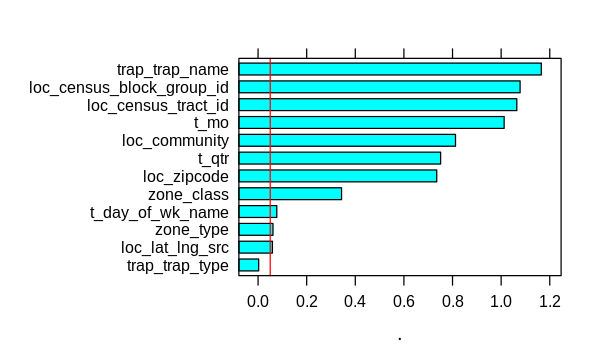

In [53]:
options(repr.plot.width=5, repr.plot.height=3)
iv_cols %>% sort() %>% 
    barchart(panel = function(...){panel.barchart(...);
                                   panel.abline(v = 0.05,col.line = "red")})

This chart tells us that the most important features (among the factor & character features) which add value for classification are trap name, census block group id, tract id, community, zipcode and class. On the other hand, week name, zone type, lat-long source and trap type have little to no predictive power {on their own}. 

Generally, if IV<0.05 the variable has very little predictive power and will not add any meaningful predictive power to your model.

In [54]:
drop_cols_based_on_iv = c("t_day_of_wk_name","zone_type","loc_lat_lng_src","trap_trap_type")

Diving deeper into each key variable, it's possible to see which levels have the highest contribution towards differentiation of the two classes. We can do this using the WOE calculation.

#### Clearly, there are some traps, zones, regions waay more predictive that others.

## <<<--------IGNORE FROM HERE---------->

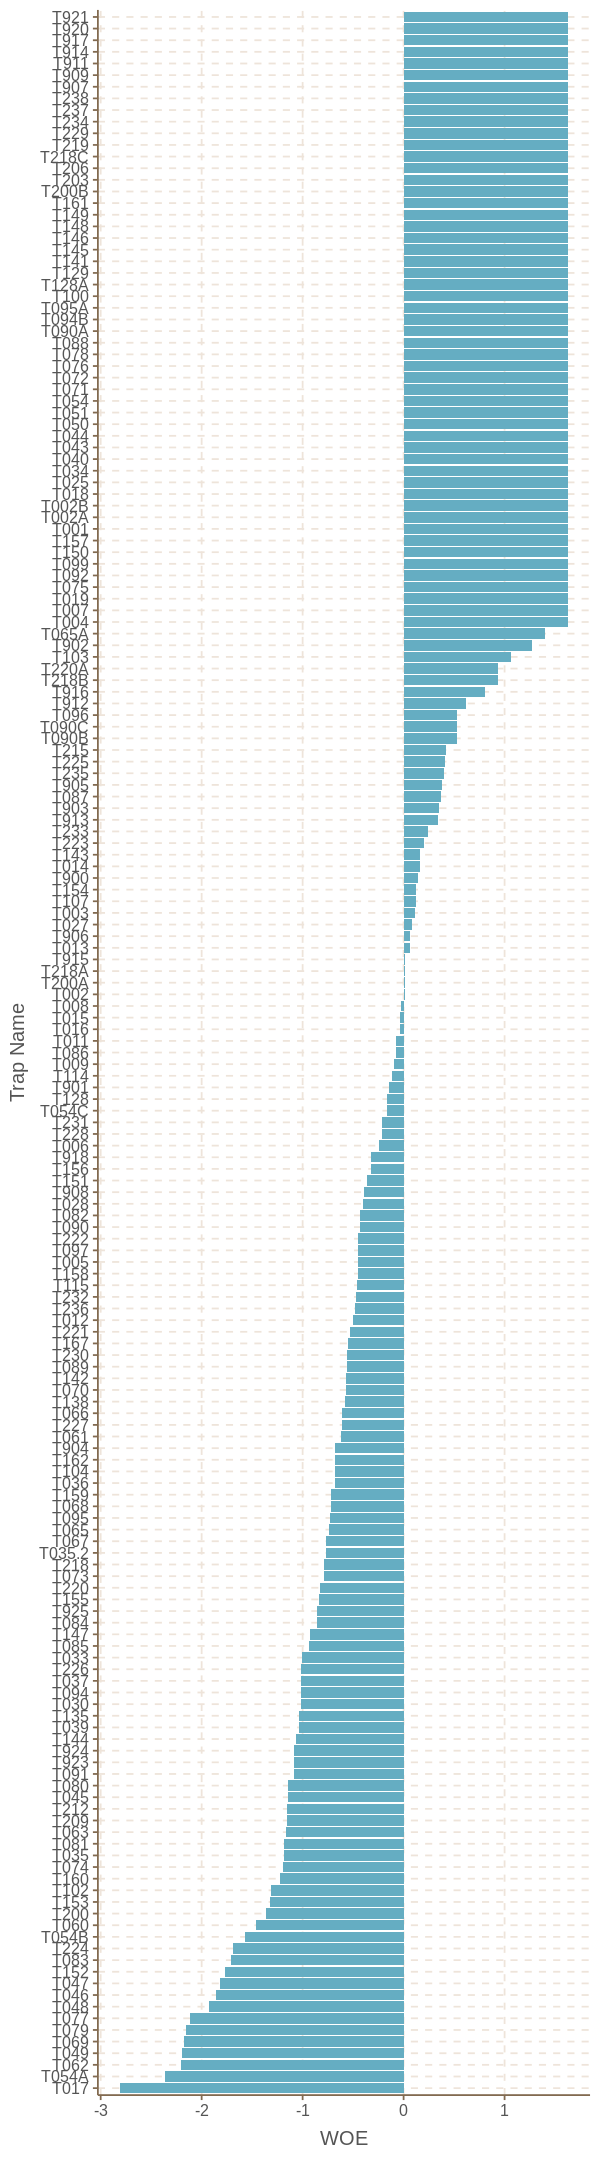

In [55]:
options(repr.plot.width=5, repr.plot.height=18)
WOETable(as.factor(df_train$trap_trap_name), df_train$mos_any_wnv_present,valueOfGood = 1) %>% 
    ggplot(aes(factor(CAT,levels=CAT[order(.$WOE)]),WOE)) + geom_col() + coord_flip() +
    labs(x="Trap Name",y="WOE")

Warning message:
“Removed 4 rows containing missing values (position_stack).”

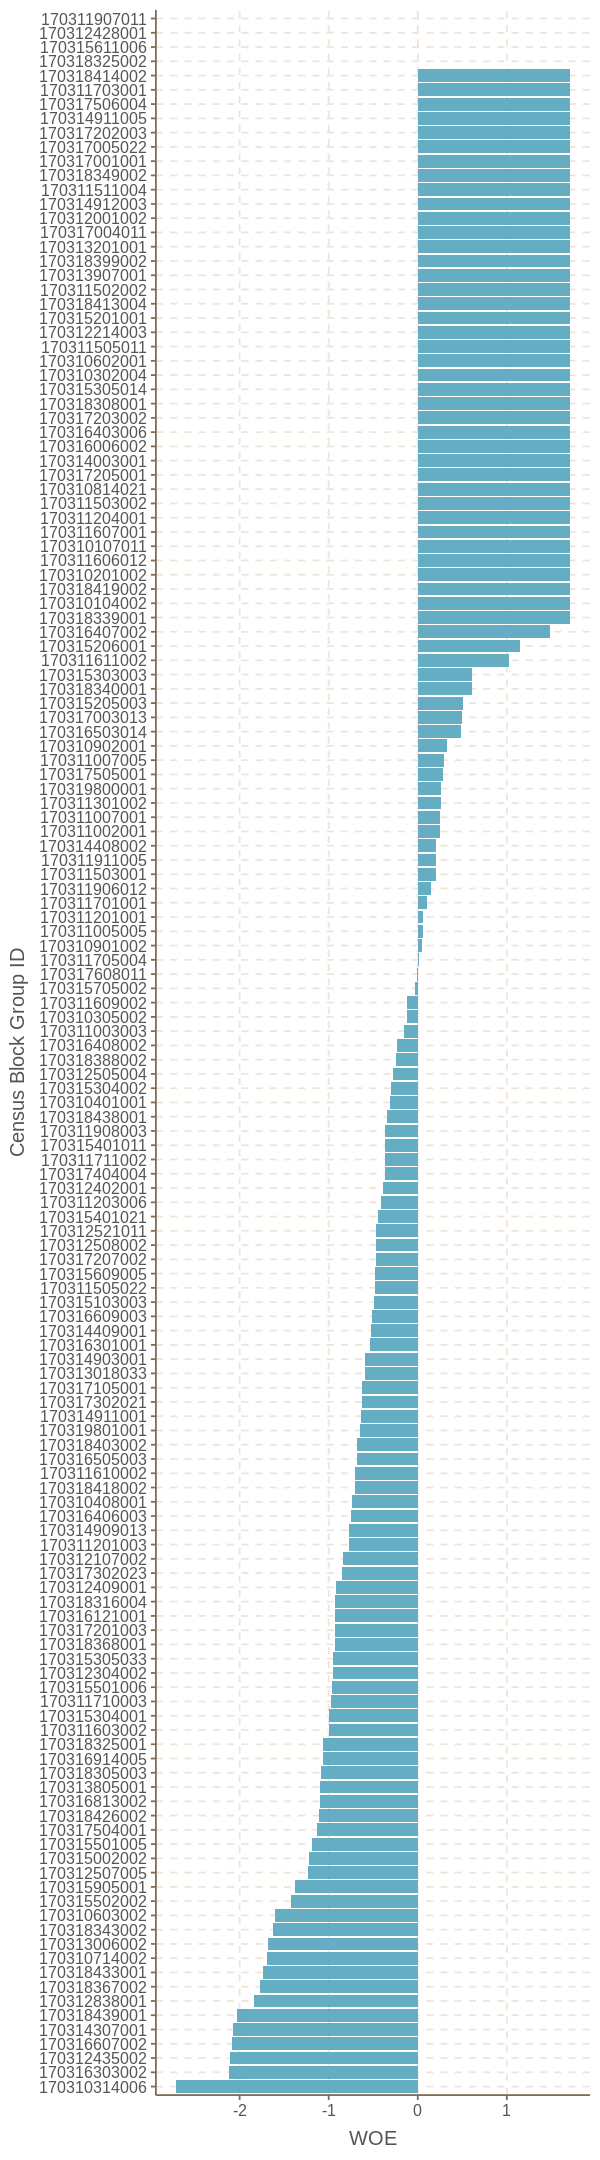

In [56]:
options(repr.plot.width=5, repr.plot.height=18)
WOETable(df_train$loc_census_block_group_id, df_train$mos_any_wnv_present,valueOfGood = 1) %>% 
    ggplot(aes(factor(CAT,levels=CAT[order(.$WOE)]),WOE)) + geom_col() + coord_flip() +
    labs(x="Census Block Group ID",y="WOE")

Warning message:
“Removed 3 rows containing missing values (position_stack).”

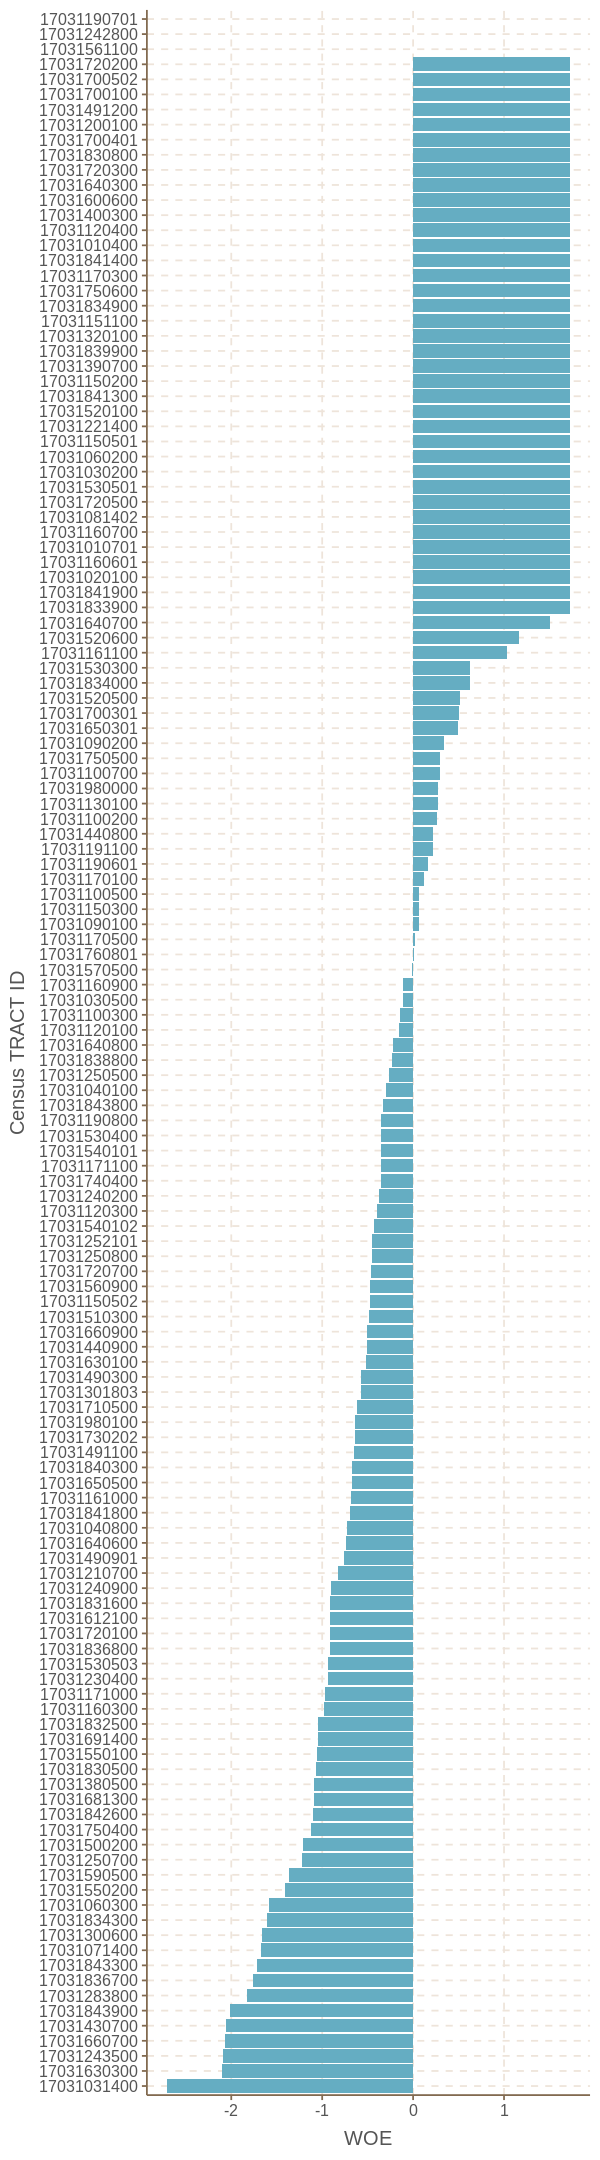

In [57]:
options(repr.plot.width=5, repr.plot.height=18)
WOETable(df_train$loc_census_tract_id, df_train$mos_any_wnv_present,valueOfGood = 1) %>% 
    ggplot(aes(factor(CAT,levels=CAT[order(.$WOE)]),WOE)) + geom_col() + coord_flip() +
    labs(x="Census TRACT ID",y="WOE")

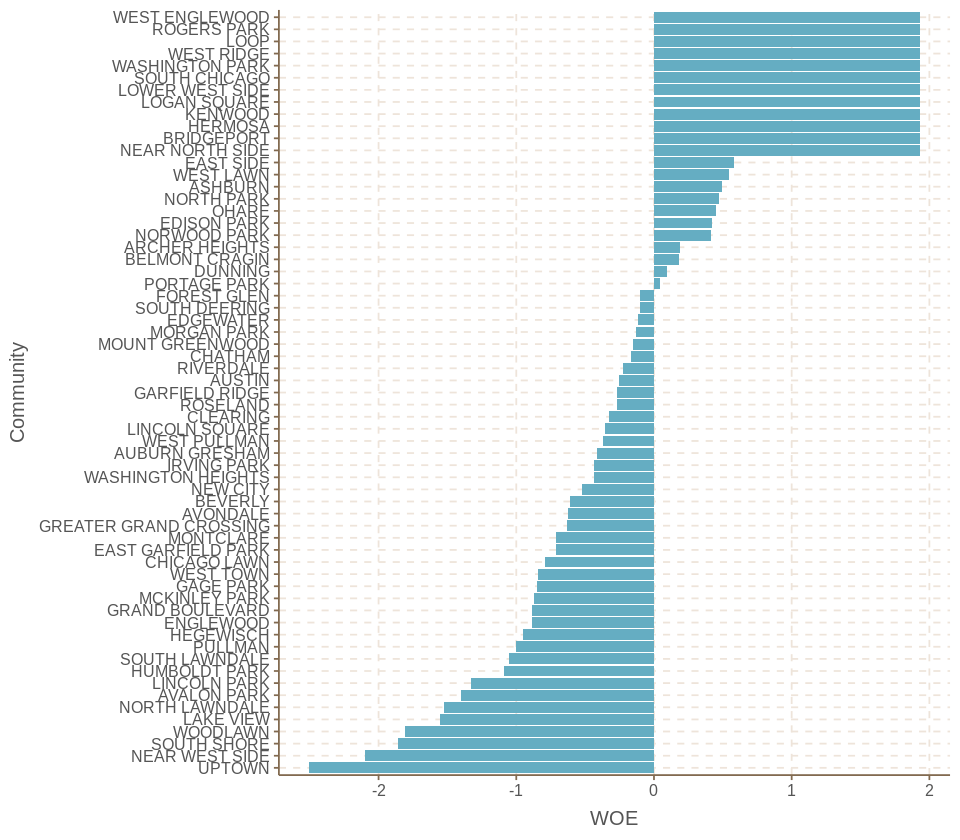

In [58]:
options(repr.plot.width=8, repr.plot.height=7)
WOETable(df_train$loc_community, df_train$mos_any_wnv_present,valueOfGood = 1) %>% 
    ggplot(aes(factor(CAT,levels=CAT[order(.$WOE)]),WOE)) + geom_col() + coord_flip() +
    labs(x="Community",y="WOE")

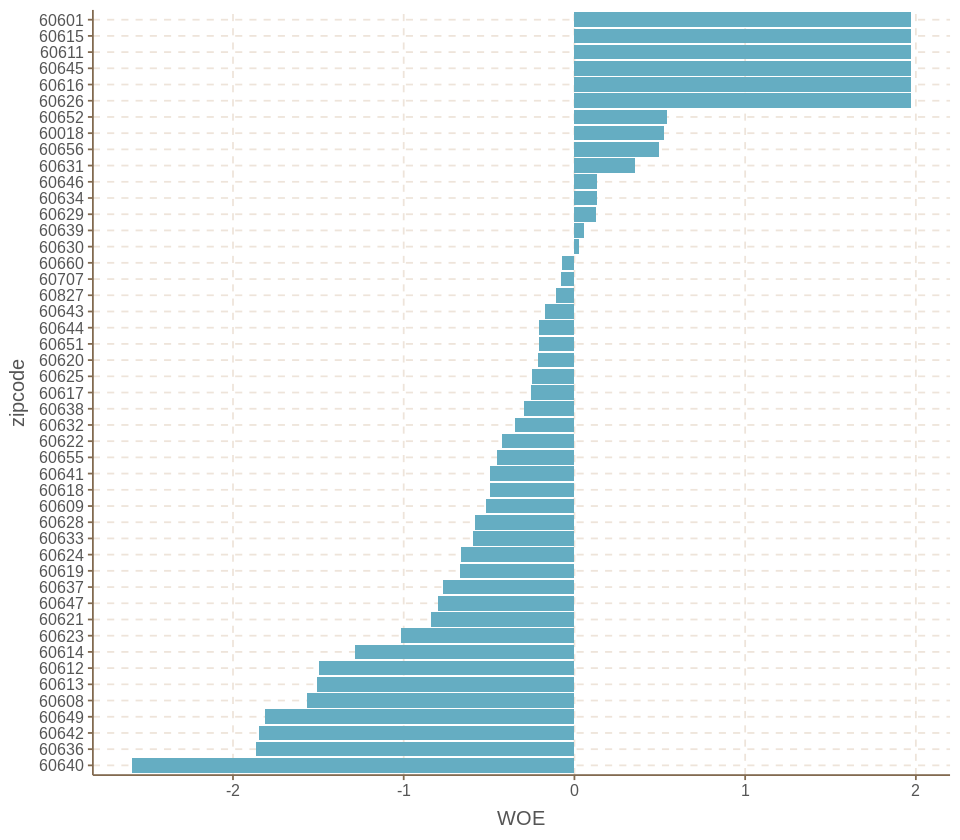

In [59]:
options(repr.plot.width=8, repr.plot.height=7)
WOETable(df_train$loc_zipcode, df_train$mos_any_wnv_present,valueOfGood = 1) %>% 
    ggplot(aes(factor(CAT,levels=CAT[order(.$WOE)]),WOE)) + geom_col() + coord_flip() +
    labs(x="zipcode",y="WOE")

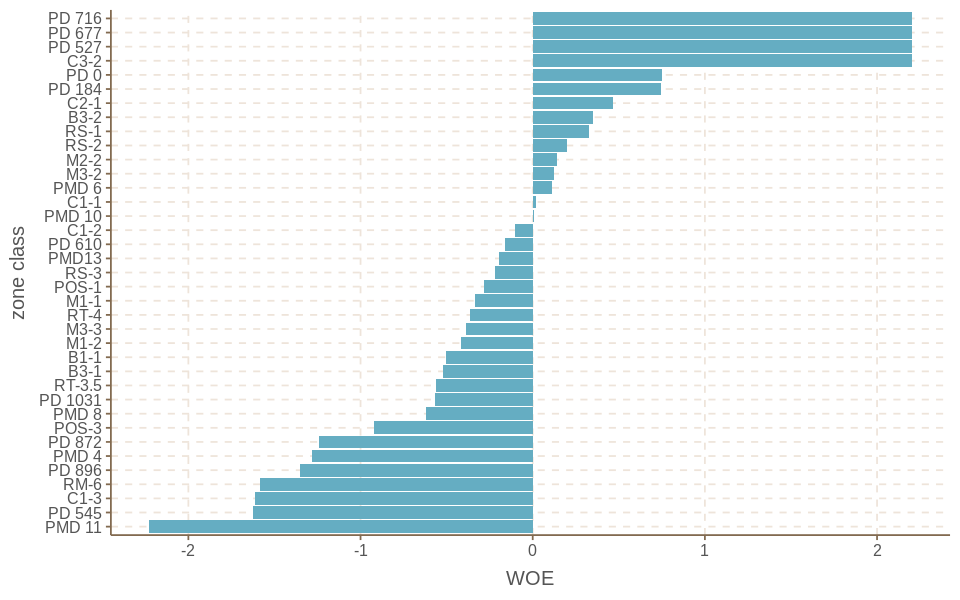

In [60]:
options(repr.plot.width=8, repr.plot.height=5)
WOETable(df_train$zone_class, df_train$mos_any_wnv_present,valueOfGood = 1) %>% 
    ggplot(aes(factor(CAT,levels=CAT[order(.$WOE)]),WOE)) + geom_col() + coord_flip() +
    labs(x="zone class",y="WOE")

In [61]:
#options(repr.plot.width=6, repr.plot.height=3)
#WOETable(as.factor(df_train$t_mo), as.numeric(df_train$mos_any_wnv_present)-1,valueOfGood = 1) %>% 
#    ggplot(aes(factor(CAT,levels=CAT[order(.$WOE)]),WOE)) + geom_col() + coord_flip() +
#    labs(x="Month",y="WOE")

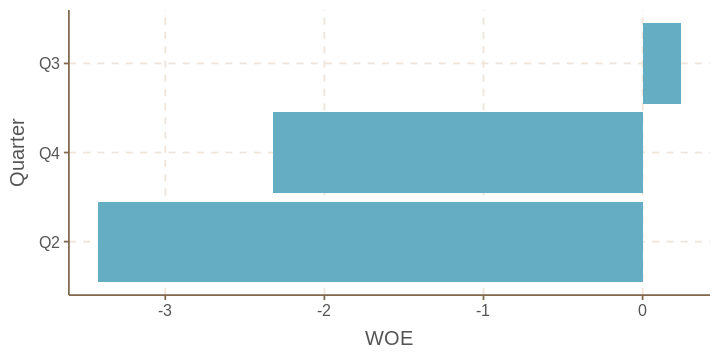

In [62]:
options(repr.plot.width=6, repr.plot.height=3)
WOETable(df_train$t_qtr, df_train$mos_any_wnv_present,valueOfGood = 1) %>% 
    ggplot(aes(factor(CAT,levels=CAT[order(.$WOE)]),WOE)) + geom_col() + coord_flip() +
    labs(x="Quarter",y="WOE")

## <<<--------IGNORE TO HERE.... FISHY CALCULATIONS... INVESTIGATING... ---------->

### After having run the analysis above...

I found that the package "Information" can perform WOE and IV across numeric and categorical vars, and has some nifty plotting features.

In [63]:
library("Information")

In [64]:
iv_tables = create_infotables(df_train, df_val, 
                              y = "mos_any_wnv_present")

[1] "Variable t_date was removed because it is a Date variable"


In [65]:
head(iv_tables$Summary)

,Variable,IV,PENALTY,AdjIV
36,mos_tot_num_mosquitos,1.6619534,0.3838941,1.2780593
30,mos_pipiens_restuans_num_mosquitos,1.4002993,0.3178861,1.0824132
9,t_eval_wk,0.8113293,0.1310897,0.6802396
1,t_mo,0.8913335,0.2297224,0.6616111
3,t_qtr,0.7510694,0.1000661,0.6510033
8,t_eval_day,0.7758762,0.1310897,0.6447865


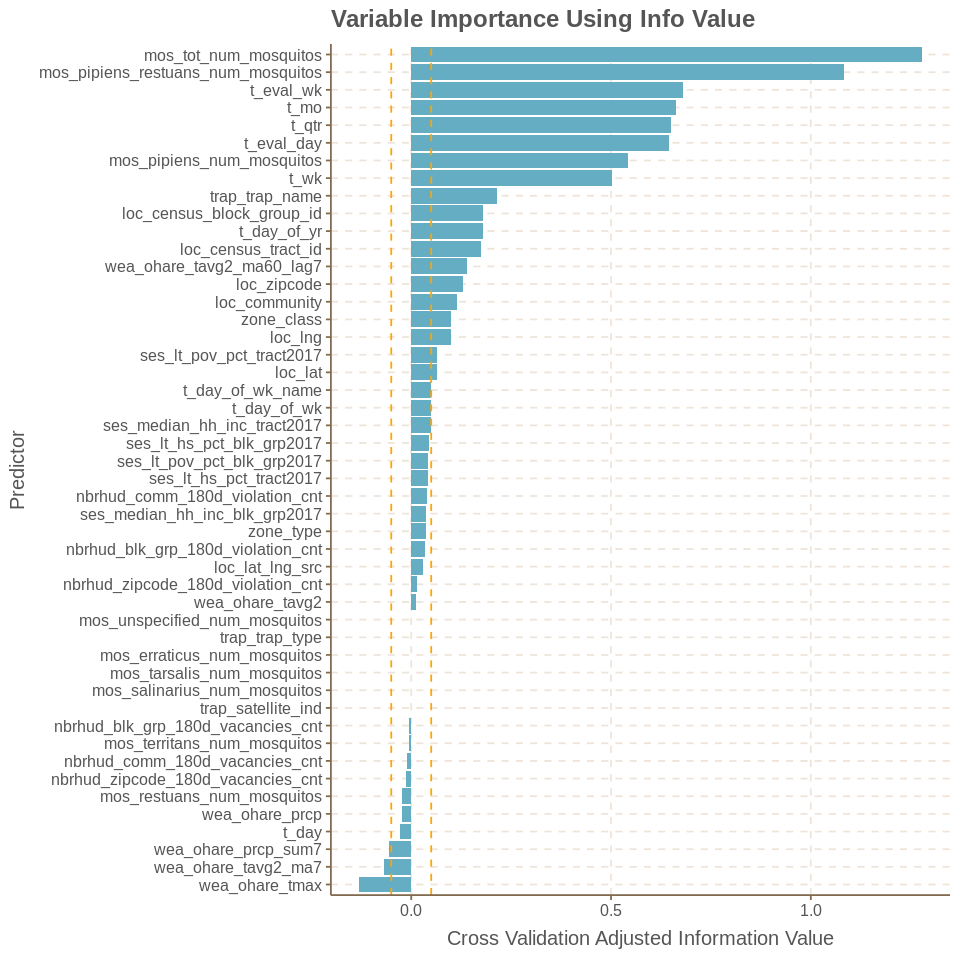

In [66]:
options(repr.plot.width=8, repr.plot.height=8)
iv_tables$Summary %>% 
    mutate(Variable = factor(Variable, levels = Variable[order(.$AdjIV)])) %>%
    ggplot(aes(x=Variable,y=AdjIV)) + 
    geom_col() +
    geom_hline(yintercept = 0.05, lty=2, color="orange") + 
    geom_hline(yintercept = -0.05, lty=2, color="orange") + 
    coord_flip() + 
    labs(x="Predictor",y="Cross Validation Adjusted Information Value",
        title = "Variable Importance Using Info Value")

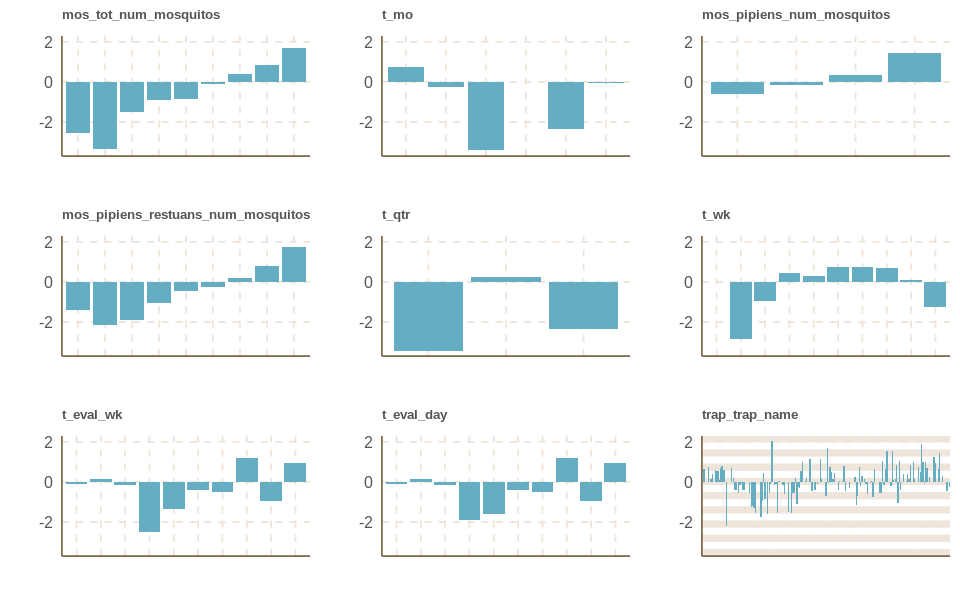

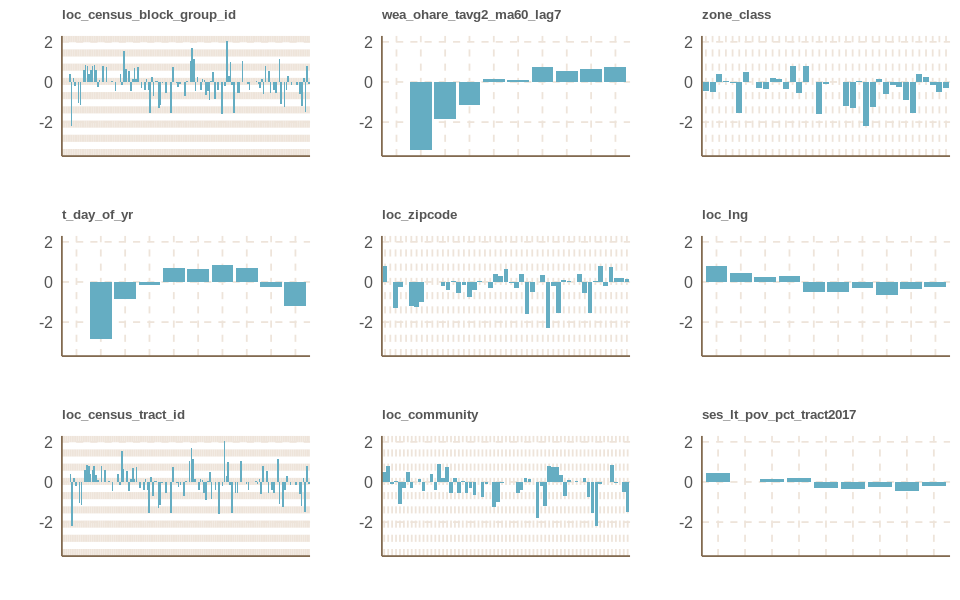

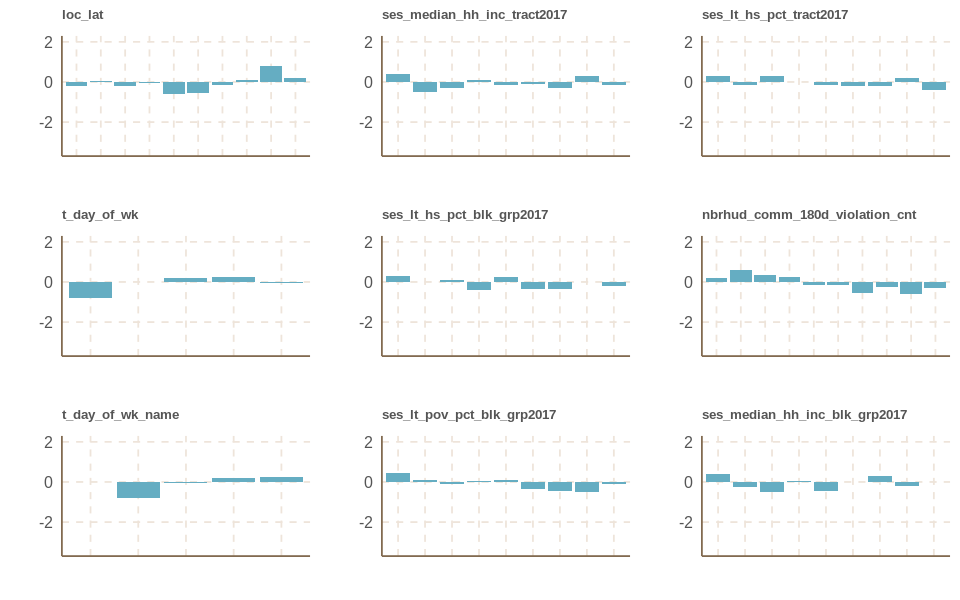

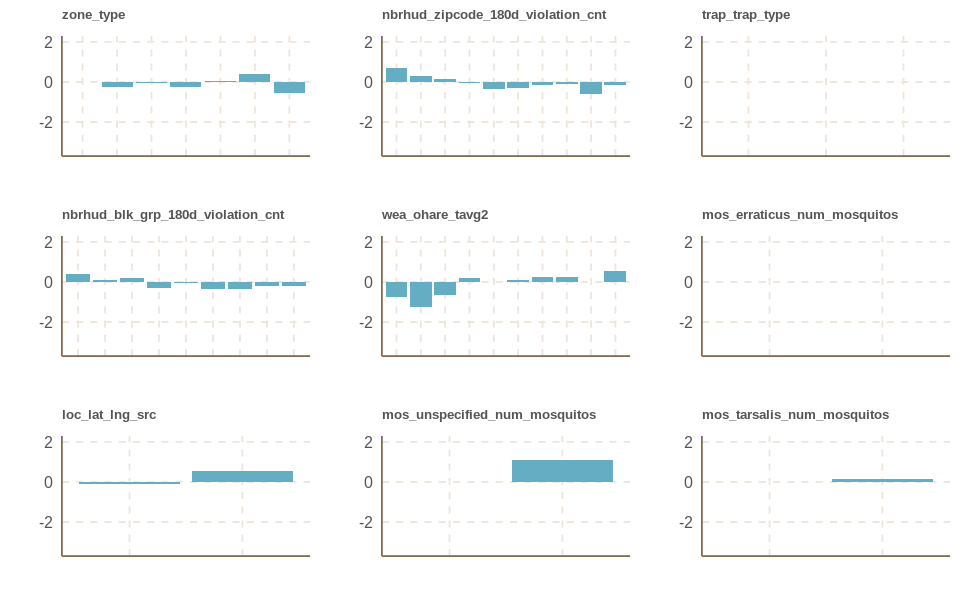

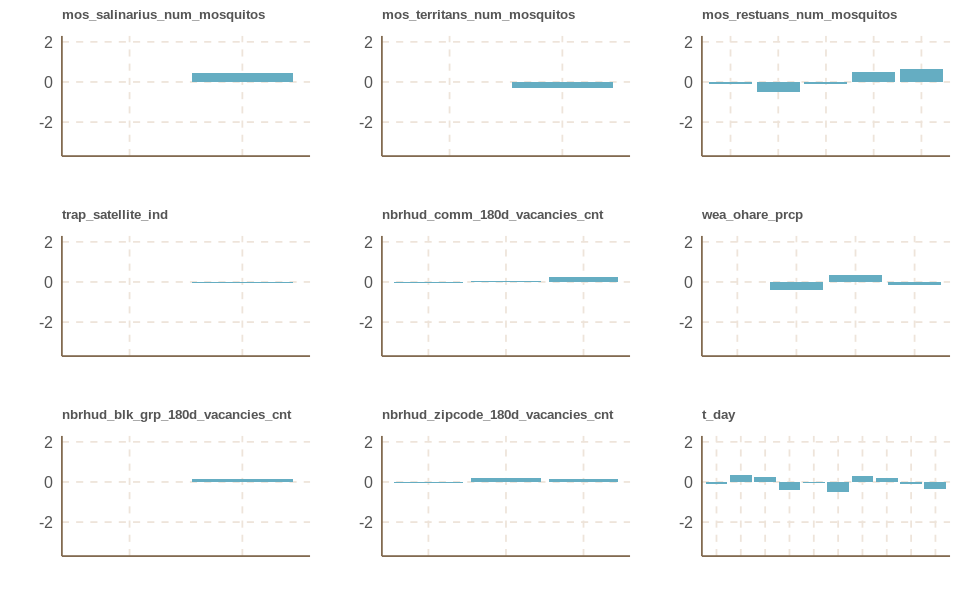

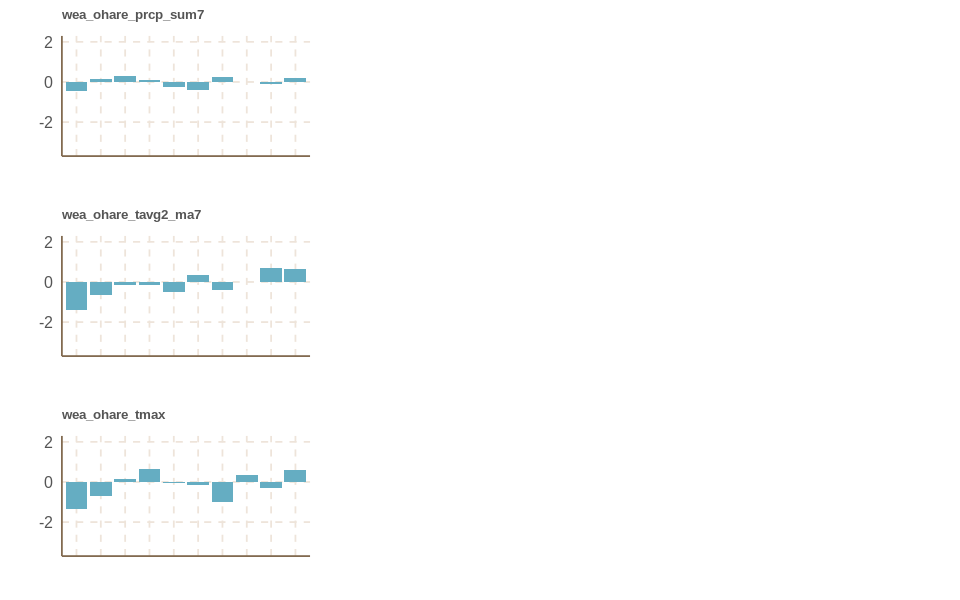

In [70]:
options(repr.plot.width=8, repr.plot.height=5)
MultiPlot(iv_tables, iv_tables$Summary$Variable,same_scales = T)

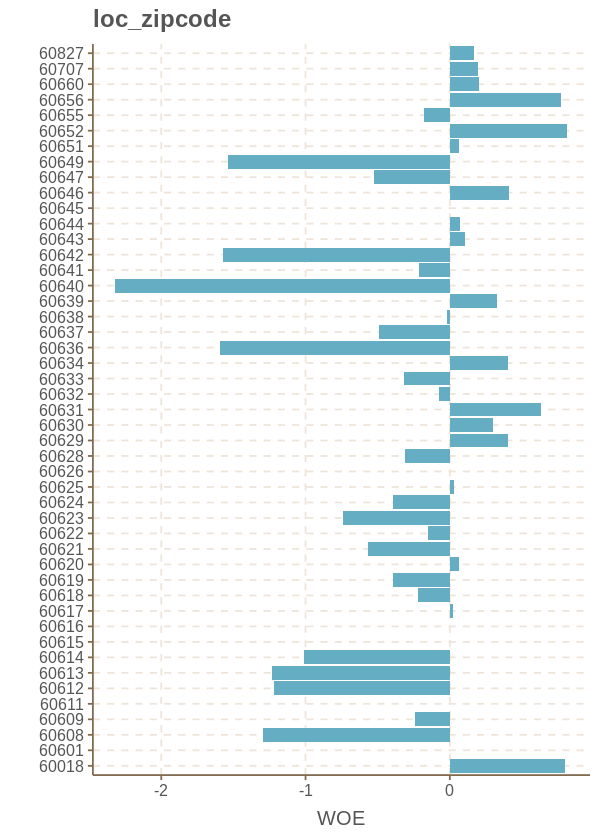

In [71]:
options(repr.plot.width=5, repr.plot.height=7)
Information::plot_infotables(iv_tables, "loc_zipcode") + coord_flip()

### Variables with low info-value

In [72]:
iv_tables$Summary %>% filter(AdjIV >=-0.05 & AdjIV <=0.05)

Variable,IV,PENALTY,AdjIV
ses_median_hh_inc_tract2017,9.099762e-02,4.268975e-02,4.830787e-02
ses_lt_hs_pct_blk_grp2017,6.929672e-02,2.403400e-02,4.526272e-02
ses_lt_pov_pct_blk_grp2017,9.696352e-02,5.375872e-02,4.320481e-02
ses_lt_hs_pct_tract2017,6.188904e-02,1.922324e-02,4.266580e-02
nbrhud_comm_180d_violation_cnt,1.408023e-01,1.009149e-01,3.988744e-02
ses_median_hh_inc_blk_grp2017,9.204718e-02,5.415907e-02,3.788811e-02
zone_type,6.142293e-02,2.458691e-02,3.683602e-02
nbrhud_blk_grp_180d_violation_cnt,8.529492e-02,5.065101e-02,3.464391e-02
loc_lat_lng_src,5.908975e-02,2.940082e-02,2.968894e-02
nbrhud_zipcode_180d_violation_cnt,1.303259e-01,1.153042e-01,1.502170e-02


In [73]:
(cols_with_low_iv_values = iv_tables$Summary %>% filter(AdjIV >=-0.05 & AdjIV <=0.05) %>% pull(Variable))

[1] "ses_median_hh_inc_tract2017"       "ses_lt_hs_pct_blk_grp2017"        
 [3] "ses_lt_pov_pct_blk_grp2017"        "ses_lt_hs_pct_tract2017"          
 [5] "nbrhud_comm_180d_violation_cnt"    "ses_median_hh_inc_blk_grp2017"    
 [7] "zone_type"                         "nbrhud_blk_grp_180d_violation_cnt"
 [9] "loc_lat_lng_src"                   "nbrhud_zipcode_180d_violation_cnt"
[11] "wea_ohare_tavg2"                   "mos_unspecified_num_mosquitos"    
[13] "trap_trap_type"                    "mos_erraticus_num_mosquitos"      
[15] "mos_tarsalis_num_mosquitos"        "mos_salinarius_num_mosquitos"     
[17] "trap_satellite_ind"                "nbrhud_blk_grp_180d_vacancies_cnt"
[19] "mos_territans_num_mosquitos"       "nbrhud_comm_180d_vacancies_cnt"   
[21] "nbrhud_zipcode_180d_vacancies_cnt" "mos_restuans_num_mosquitos"       
[23] "wea_ohare_prcp"                    "t_day"

In [79]:
# Add WOE predictor columns
factor_cols = df_train %>% select_if(is.factor) %>% names
cols_to_add_woe_for = factor_cols[!(factor_cols %in% cols_with_low_iv_values)]
add_WOE_predictor_cols = function(df, col_name, iv_tables){
    translation_table = iv_tables$Tables[col_name][[1]][c(col_name,"WOE")]
    woe_table = df[col_name] %>% left_join(translation_table) %>% select(WOE)
    colnames(woe_table) = paste0("woe_",col_name)
    df %>% bind_cols(woe_table)  
}

In [80]:
cols_to_add_woe_for

[1] "t_mo"                      "t_qtr"                    
[3] "t_day_of_wk_name"          "trap_trap_name"           
[5] "loc_zipcode"               "loc_census_block_group_id"
[7] "loc_census_tract_id"       "loc_community"            
[9] "zone_class"

In [81]:
for(col_name in cols_to_add_woe_for){
    df_train = add_WOE_predictor_cols(df_train, col_name, iv_tables)
}

Joining, by = "t_mo"
Warning message:
“Column `t_mo` joining factor and character vector, coercing into character vector”Joining, by = "t_qtr"
Warning message:
“Column `t_qtr` joining factor and character vector, coercing into character vector”Joining, by = "t_day_of_wk_name"
Warning message:
“Column `t_day_of_wk_name` joining factor and character vector, coercing into character vector”Joining, by = "trap_trap_name"
Warning message:
“Column `trap_trap_name` joining factor and character vector, coercing into character vector”Joining, by = "loc_zipcode"
Warning message:
“Column `loc_zipcode` joining factor and character vector, coercing into character vector”Joining, by = "loc_census_block_group_id"
Warning message:
“Column `loc_census_block_group_id` joining factor and character vector, coercing into character vector”Joining, by = "loc_census_tract_id"
Warning message:
“Column `loc_census_tract_id` joining factor and character vector, coercing into character vector”Joining, by = "loc_co

In [82]:
glimpse(df_train)

Observations: 8,222
Variables: 59
$ t_date                             <date> 2007-05-29, 2007-05-29, 2007-05...
$ t_mo                               <fct> May, May, May, May, May, May, Ma...
$ t_day                              <int> 29, 29, 29, 29, 29, 29, 29, 29, ...
$ t_qtr                              <fct> Q2, Q2, Q2, Q2, Q2, Q2, Q2, Q2, ...
$ t_wk                               <int> 22, 22, 22, 22, 22, 22, 22, 22, ...
$ t_day_of_yr                        <int> 149, 149, 149, 149, 149, 149, 14...
$ t_day_of_wk                        <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,...
$ t_day_of_wk_name                   <fct> Mon, Mon, Mon, Mon, Mon, Mon, Mo...
$ t_eval_day                         <int> 514, 514, 514, 514, 514, 514, 51...
$ t_eval_wk                          <int> 74, 74, 74, 74, 74, 74, 74, 74, ...
$ trap_trap_name                     <fct> T002, T007, T015, T045, T046, T0...
$ loc_lat                            <dbl> 41.95630, 41.99549, 41.97418, 41...
$ loc_lng         

In [83]:
for(col_name in cols_to_add_woe_for){
    df_val = add_WOE_predictor_cols(df_val, col_name, iv_tables)
}

Joining, by = "t_mo"
Warning message:
“Column `t_mo` joining factor and character vector, coercing into character vector”Joining, by = "t_qtr"
Warning message:
“Column `t_qtr` joining factor and character vector, coercing into character vector”Joining, by = "t_day_of_wk_name"
Warning message:
“Column `t_day_of_wk_name` joining factor and character vector, coercing into character vector”Joining, by = "trap_trap_name"
Warning message:
“Column `trap_trap_name` joining factor and character vector, coercing into character vector”Joining, by = "loc_zipcode"
Warning message:
“Column `loc_zipcode` joining factor and character vector, coercing into character vector”Joining, by = "loc_census_block_group_id"
Warning message:
“Column `loc_census_block_group_id` joining factor and character vector, coercing into character vector”Joining, by = "loc_census_tract_id"
Warning message:
“Column `loc_census_tract_id` joining factor and character vector, coercing into character vector”Joining, by = "loc_co

# Save to file

In [84]:
saveRDS(df_train,file = "df_train_after_03FE.RData")
saveRDS(df_val,file = "df_val_after_03FE.RData")

In [85]:
saveRDS(cols_with_low_iv_values, file="cols_with_low_iv_values.RData")

In [86]:
saveRDS(cols_to_add_woe_for, file="cols_with_woe_added.RData")